In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('bank/bank.csv', sep=';')
data.shape

(4521, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:

features = [
    'age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 
    'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'
]

In [9]:
data = data[features]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   balance    4521 non-null   int64 
 5   housing    4521 non-null   object
 6   contact    4521 non-null   object
 7   day        4521 non-null   int64 
 8   month      4521 non-null   object
 9   duration   4521 non-null   int64 
 10  campaign   4521 non-null   int64 
 11  pdays      4521 non-null   int64 
 12  previous   4521 non-null   int64 
 13  poutcome   4521 non-null   object
 14  y          4521 non-null   object
dtypes: int64(7), object(8)
memory usage: 529.9+ KB


In [11]:
data.nunique()

age            67
job            12
marital         3
education       4
balance      2353
housing         2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [12]:
data.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
data

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,4789,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,1350,yes,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,1476,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,0,yes,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,-333,yes,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,-3313,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,295,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,1137,no,cellular,6,feb,129,4,211,3,other,no


In [14]:
#What is the most frequent observation (mode) for the column education?

data.describe(include=["O"])

,job,marital,education,housing,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,3,12,4,2
top,management,married,secondary,yes,cellular,may,unknown,no
freq,969,2797,2306,2559,2896,1398,3705,4000


In [15]:
data['education'].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [17]:

# Question 2

#     Create the correlation matrix for the numerical features of your dataset
#     In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset
#     What are the two features that have the biggest correlation in this dataset?

data_numeric = data.copy()
data_numeric = data.drop(
    ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome', 'y'], axis=1
)
data_numeric.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [18]:
data_numeric.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


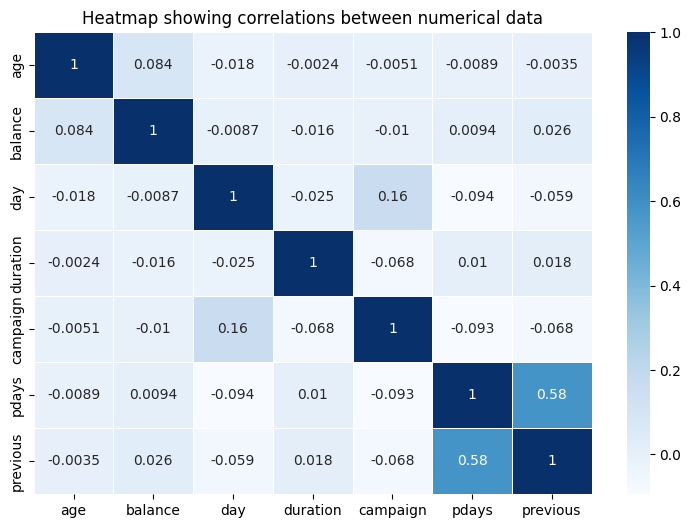

In [19]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [20]:
data_numeric.corr().unstack().sort_values(ascending=False)

age       age         1.000000
balance   balance     1.000000
day       day         1.000000
campaign  campaign    1.000000
duration  duration    1.000000
pdays     pdays       1.000000
previous  previous    1.000000
pdays     previous    0.577562
previous  pdays       0.577562
day       campaign    0.160706
campaign  day         0.160706
balance   age         0.083820
age       balance     0.083820
balance   previous    0.026196
previous  balance     0.026196
duration  previous    0.018080
previous  duration    0.018080
duration  pdays       0.010380
pdays     duration    0.010380
balance   pdays       0.009437
pdays     balance     0.009437
duration  age        -0.002367
age       duration   -0.002367
          previous   -0.003511
previous  age        -0.003511
campaign  age        -0.005148
age       campaign   -0.005148
balance   day        -0.008677
day       balance    -0.008677
age       pdays      -0.008894
pdays     age        -0.008894
campaign  balance    -0.009976
balance 

In [21]:

# Target encoding

#     Now we want to encode the y variable
#     Let's replace the values yes/no with 1/0
data.y = (data.y == 'yes').astype(int)
data


,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,4789,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,1350,yes,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,1476,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,yes,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,-333,yes,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,-3313,yes,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,295,no,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,1137,no,cellular,6,feb,129,4,211,3,other,0


In [22]:

# Split the data

#     Split your data in train/val/test sets with 60%/20%/20% distribution
#     Use Scikit-Learn for that (the train_test_split function) and set the seed to 42
#     Make sure that the target value y is not in your dataframe

SEED = 42

In [23]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

assert len(data) == (len(df_train) + len(df_val) + len(df_test))

In [24]:
len(df_train), len(df_val), len(df_test)

(2712, 904, 905)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
